In [15]:
path = "dataset/praprocessed_dataset.csv"

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [17]:
data = pd.read_csv(path)

In [18]:
# count missing values each row
data.isnull().sum()

tanggal       0
stasiun       0
pm10        758
so2         568
co          392
o3          646
no2         528
max           0
critical      0
categori      0
dtype: int64

In [19]:
# Drop rows with any missing values
data.dropna(axis=0, inplace=True)

In [20]:
# Convert remaining categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['critical'])

In [21]:
# Splitting the dataset into features and target variable
X = data.drop(columns=['tanggal', 'categori', 'max', 'stasiun'])  # Features
y = data['categori']  # Target variable

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the labels for test set
y_pred = model.predict(X_test)

print(f"Total train data : {len(X_train)}")
print(f"Total test data : {len(X_test)}")

Total train data : 11980
Total test data : 5135


In [23]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9859785783836417
                    precision    recall  f1-score   support

              BAIK       0.98      0.98      0.98       928
SANGAT TIDAK SEHAT       1.00      1.00      1.00        41
            SEDANG       0.99      0.99      0.99      3445
       TIDAK SEHAT       0.98      0.97      0.97       721

          accuracy                           0.99      5135
         macro avg       0.99      0.99      0.99      5135
      weighted avg       0.99      0.99      0.99      5135

[[ 914    0   14    0]
 [   0   41    0    0]
 [  16    0 3412   17]
 [   0    0   25  696]]


<Axes: >

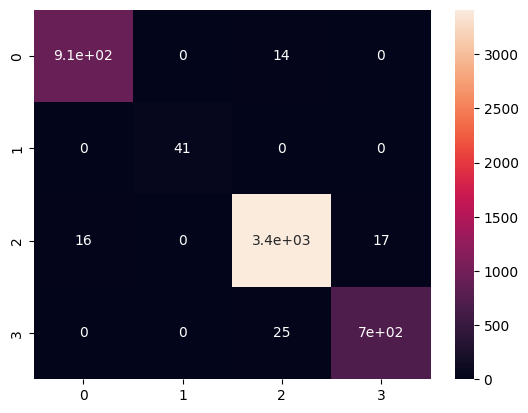

In [24]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [25]:
print("\nFeature Importance:")
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


Feature Importance:
o3               0.622143
pm10             0.264841
critical_PM25    0.062871
so2              0.023765
co               0.016166
no2              0.010214
critical_CO      0.000000
critical_NO2     0.000000
critical_O3      0.000000
critical_PM10    0.000000
critical_SO2     0.000000
dtype: float64
